# Exploratory Data Analysis Term Project
    DSC530-T301
    Dr. Parajulee
    6/5/2021
    Sadie Harper

## Import Libraries

In [174]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in data from Zillow and Kaggle

In [2]:
# Zillow's typical home value for 3 California counties
zhvi = pd.read_csv('Desktop/Bellevue/Data Exploration & Analysis/Term Project/Data/ZHVI_county.csv')
zhvi = zhvi[(zhvi['RegionName'] == 'Los Angeles County') | (zhvi['RegionName'] == 'Orange County') | (zhvi['RegionName'] == 'Ventura County')]
zhvi = zhvi[(zhvi['State'] == 'CA')]
zhvi.reset_index(inplace=True)
#zhvi = zhvi.drop(['SizeRank', 'RegionID', 'StateName', 'index', 'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS','RegionType'], axis=1)
#zhvi.drop(zhvi.iloc[:, 1:229], inplace = True, axis = 1)
zhvi = zhvi.filter(items=['RegionName', '1/31/2014', '1/31/2015'])
zhvi.head()

,RegionName,1/31/2014,1/31/2015
0,Los Angeles County,884994.0,909913.0
1,Orange County,972798.0,972941.0
2,Ventura County,740544.0,752544.0


In [3]:
# Calulate percent change from Jan 2014 to Jan 2015
zhvi['pct_chg'] = 100 * ((zhvi['1/31/2015'] - zhvi['1/31/2014']) / zhvi['1/31/2014'])
zhvi.columns = ['fips', '2014', '2015', 'pct_change']

In [4]:
# 2016 properties
properties_2016 = pd.read_csv('Desktop/Bellevue/Data Exploration & Analysis/Term Project/Data/properties_2016.csv')
properties_2016.head()

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
# 2017 properties
properties_2017 = pd.read_csv('Desktop/Bellevue/Data Exploration & Analysis/Term Project/Data/properties_2017.csv')
properties_2017.head()

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [6]:
# Concat 2016 and 2017 properties into one dataframe
property_df = [properties_2016, properties_2017]
properties = pd.concat(property_df)
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


# Analysis

In [7]:
# Look at all columns
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970434 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [8]:
# Rename columns - descriptions from dictionary file from Kaggle
properties.columns = ['parcel_id', 'air_conditioning', 'architectural_style', 'area_basement', 'num_bathroom', 'num_bedroom', 
                      'building_class', 'building_quality','num_bathroom_calc', 'deck_type', 'area_living_finished_floor1', 
                      'area_living_finished_total', 'area_total_finished', 'area_perimeter', 'area_total', 
                      'area_living_finished_floor1_50', 'area_base', 'fips', 'num_fireplace', 'num_full_bath', 'num_garage', 
                      'area_garage', 'spa_flag', 'heating', 'latitude', 'longitude', 'area_lot', 'num_pool', 'area_pool', 
                      'spa_only', 'spa_pool', 'pool_only', 'zone_country', 'zoning', 'allowed_zoning', 'census_raw', 'city_id', 
                      'county_id', 'neighborhood_id', 'zip_id', 'num_room', 'stories', 'num_3/4_bath', 'construction_type', 
                      'num_units', 'area_patio', 'area_shed', 'year_built', 'num_stories', 'fireplace_flag', 'tax_building', 
                      'tax_total', 'tax_year', 'tax_land', 'tax_property', 'tax_delinquency_flag','tax_delinquency_year','census']

In [9]:
# Drop duplicate values
properties.drop_duplicates(inplace=True)

In [10]:
# Check for missing values
properties.isnull().sum().sort_values()

parcel_id                               0
fips                                14369
zoning                              14369
census_raw                          14369
county_id                           14369
longitude                           14369
latitude                            14369
tax_year                            14371
num_bedroom                         14382
num_bathroom                        14394
num_room                            14407
zone_country                        15274
zip_id                              25346
tax_property                        51560
tax_total                           76511
area_living_finished_total          99576
tax_building                       100388
year_built                         106706
city_id                            123581
tax_land                           127132
census                             148126
num_full_bath                      244564
num_bathroom_calc                  244564
area_total_finished               

In [47]:
# Filter to only single family homes
properties = properties[(properties['zoning'] == 261)]

261.0    4299234
Name: zoning, dtype: int64

In [41]:
# recode null flags as N
properties['tax_delinquency_flag'].fillna('N', inplace=True)
properties.loc[(properties.tax_delinquency_flag == True), 'tax_delinquency_flag'] = 'Y'

In [42]:
# choose final features
property_features = properties.filter(items=['parcel_id', 'tax_total', 'fips', 'num_bedroom', 'num_bathroom', 
                                             'tax_delinquency_flag', 'area_living_finished_total','area_lot'])
property_features.loc[(property_features.fips == 6037.0), 'fips'] = 'Los Angeles County'
property_features.loc[(property_features.fips == 6059.0), 'fips'] = 'Orange County'
property_features.loc[(property_features.fips == 6111.0), 'fips'] = 'Ventura County'
property_features['fips'].value_counts()

Los Angeles County    2860195
Orange County         1107791
Ventura County         331248
Name: fips, dtype: int64

In [140]:
# merge on typical home value data
property_df = pd.merge(property_features, zhvi, how = 'left', on = 'fips')
property_df.drop(['2014', '2015'], inplace=True, axis=1)
property_df.head()

,parcel_id,tax_total,fips,num_bedroom,num_bathroom,tax_delinquency_flag,area_living_finished_total,area_lot,pct_change
0,10759547,27516.0,Los Angeles County,0.0,0.0,N,NaN,4083.0,2.815725
1,11193347,10.0,Los Angeles County,0.0,0.0,N,NaN,11975.0,2.815725
2,11215747,10.0,Los Angeles County,0.0,0.0,N,NaN,9403.0,2.815725
3,11229347,2077.0,Los Angeles County,0.0,0.0,N,NaN,3817.0,2.815725
4,11324547,291973.0,Los Angeles County,4.0,2.0,N,3633.0,9826.0,2.815725


In [132]:
round(property_df.describe(include='all'))

,parcel_id,tax_total,fips,num_bedroom,num_bathroom,tax_delinquency_flag,area_living_finished_total,area_lot,pct_change
count,4299234.0,4298258.0,4299234,4299223.0,4299223.0,4299234,4281255.0,4273470.0,4299234.0
unique,NaN,NaN,3,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,Los Angeles County,NaN,NaN,N,NaN,NaN,NaN
freq,NaN,NaN,2860195,NaN,NaN,4216843,NaN,NaN,NaN
mean,13018373.0,449682.0,NaN,3.0,2.0,NaN,1861.0,11184.0,2.0
std,3996716.0,675874.0,NaN,1.0,1.0,NaN,1219.0,321108.0,1.0
min,10711725.0,1.0,NaN,0.0,0.0,NaN,1.0,100.0,0.0
25%,11658637.0,183720.0,NaN,3.0,2.0,NaN,1256.0,5635.0,0.0
50%,12596987.0,319798.0,NaN,3.0,2.0,NaN,1621.0,6760.0,3.0
75%,14054451.0,520802.0,NaN,4.0,3.0,NaN,2205.0,8550.0,3.0


count    4004146.0
mean      364996.0
std       260488.0
min            9.0
25%       178559.0
50%       307282.0
75%       484000.0
max      1500000.0
Name: tax_total, dtype: float64
Spread: 1499991.0


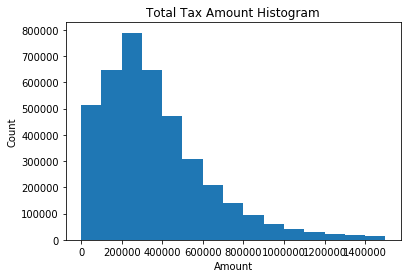

In [147]:
# Total tax amount
plt.hist(property_df['tax_total'], bins=15)
plt.title('Total Tax Amount Histogram')
plt.xlabel('Amount')
plt.ylabel('Count')
print(round(property_df['tax_total'].describe()))
minn = property_df['tax_total'].min()
maxx = property_df['tax_total'].max()
spread = maxx - minn
print('Spread: %s' %spread)

count    4004146.0
mean           3.0
std            1.0
min            0.0
25%            3.0
50%            3.0
75%            4.0
max            6.0
Name: num_bedroom, dtype: float64
Spread: 6.0


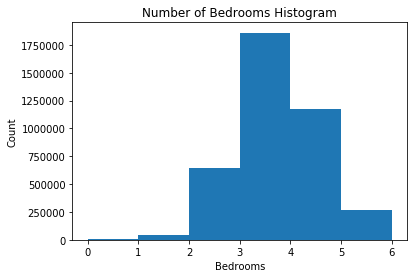

In [153]:
# Number of bedrooms
plt.hist(property_df['num_bedroom'],bins=6)
plt.title('Number of Bedrooms Histogram')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
print(round(property_df['num_bedroom'].describe()))
minn = property_df['num_bedroom'].min()
maxx = property_df['num_bedroom'].max()
spread = maxx - minn
print('Spread: %s' %spread)

count    4004146.0
mean           2.0
std            1.0
min            0.0
25%            2.0
50%            2.0
75%            3.0
max            6.0
Name: num_bathroom, dtype: float64
Spread: 5.5


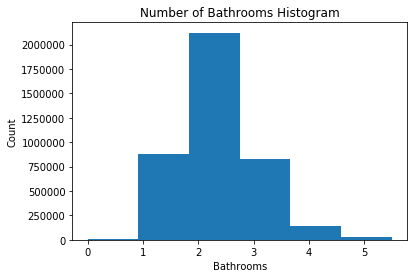

In [156]:
# Number of bathrooms
plt.hist(property_df['num_bathroom'],bins=6)
plt.title('Number of Bathrooms Histogram')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
print(round(property_df['num_bathroom'].describe()))
minn = property_df['num_bathroom'].min()
maxx = property_df['num_bathroom'].max()
spread = maxx - minn
print('Spread: %s' %spread)

count    3996436.0
mean        1737.0
std          683.0
min            1.0
25%         1242.0
50%         1584.0
75%         2096.0
max         4500.0
Name: area_living_finished_total, dtype: float64
Spread: 4499.0


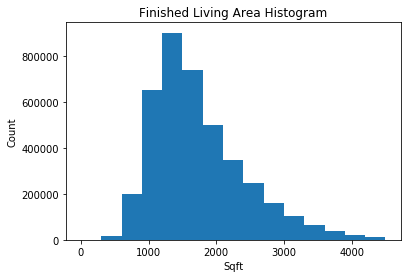

In [161]:
# finished living area sqft 
plt.hist(property_df['area_living_finished_total'], bins=15)
plt.title('Finished Living Area Histogram')
plt.xlabel('Sqft')
plt.ylabel('Count')
print(round(property_df['area_living_finished_total'].describe()))
minn = property_df['area_living_finished_total'].min()
maxx = property_df['area_living_finished_total'].max()
spread = maxx - minn
print('Spread: %s' %spread)

count    3996436.0
mean        7483.0
std         3676.0
min          104.0
25%         5570.0
50%         6650.0
75%         8108.0
max        30000.0
Name: area_lot, dtype: float64
Spread: 29896.0


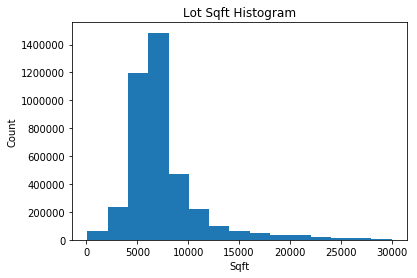

In [163]:
# lot sqft
plt.hist(property_df['area_lot'], bins=15)
plt.title('Lot Sqft Histogram')
plt.xlabel('Sqft')
plt.ylabel('Count')
print(round(property_df['area_lot'].describe()))
minn = property_df['area_lot'].min()
maxx = property_df['area_lot'].max()
spread = maxx - minn
print('Spread: %s' %spread)

In [138]:
 print(property_df[property_df['area_lot'] > 1500000].count())
x = 4298258.0
y = 133544
print((y/x)*100)

parcel_id                     877
tax_total                     869
fips                          877
num_bedroom                   877
num_bathroom                  877
tax_delinquency_flag          877
area_living_finished_total    762
area_lot                      877
pct_change                    877
dtype: int64
3.10693308777649


In [157]:
property_df = property_df[property_df['tax_total'] <= 1500000.0]
property_df = property_df[property_df['num_bedroom'] < 7.0]
property_df = property_df[property_df['num_bedroom'] > 0.0]
property_df = property_df[property_df['num_bathroom'] < 6.0]
property_df = property_df[property_df['num_bathroom'] > 0.0]
property_df = property_df[property_df['area_living_finished_total'] <= 4500.0]
property_df = property_df[property_df['area_lot'] <= 30000.0]
round(property_df.describe())

,parcel_id,tax_total,num_bedroom,num_bathroom,area_living_finished_total,area_lot,pct_change
count,3996436.0,3996436.0,3996436.0,3996436.0,3996436.0,3996436.0,3996436.0
mean,12974698.0,365318.0,3.0,2.0,1737.0,7483.0,2.0
std,2821650.0,260432.0,1.0,1.0,683.0,3676.0,1.0
min,10711725.0,10.0,1.0,0.0,1.0,104.0,0.0
25%,11702859.0,178880.0,3.0,2.0,1242.0,5570.0,0.0
50%,12618742.0,307452.0,3.0,2.0,1584.0,6650.0,3.0
75%,14051786.0,484295.0,4.0,3.0,2096.0,8108.0,3.0
max,168183614.0,1500000.0,6.0,6.0,4500.0,30000.0,3.0


In [ ]:
# PMF
pmf = property_df['tax_total'].value_counts().sort_index() / len(property_df['tax_total'])
pmf.plot('bar')

https://www.kaggle.com/c/zillow-prize-1/data?select=properties_2016.csv source cite
https://www.kaggle.com/philippsp/exploratory-analysis-zillow/report eda cite